# Author: Aayushma Pant

## Task 2
## From iris dataset, predict the optimum number of clusters and represent it visually.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
data=pd.read_csv("Iris.csv")

In [8]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()
# no null objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [22]:
X_features=data.drop(["Species","Id"],axis=1)
X=np.array(X_features)

In [25]:
X.shape

(150, 4)

In [16]:
y_class=data["Species"]

In [17]:
X_features

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Using elbow method to determine the number of cluster


In [26]:
from sklearn.cluster import KMeans

In [27]:
X.shape

(150, 4)

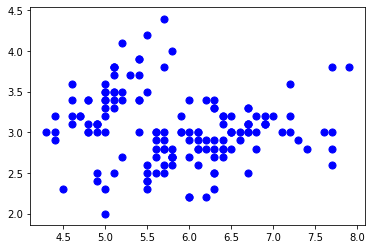

In [57]:
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b') #using the features from first two columns
plt.show()

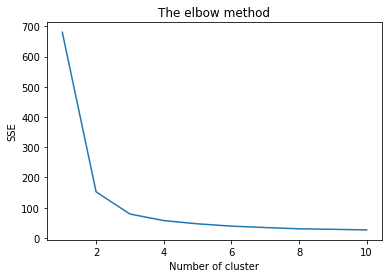

In [32]:
#lets check from 1 to 10 where we can determine the numberr of clusters.
sse=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300, random_state=141)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)#Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(range(1,11), sdc)
plt.title('The elbow method')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()    
    
    

## from the graph above we concluded that 3 is the optimal number of cluster for the iris datasets

In [40]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300, random_state=141)
y_kmeans=kmeans.fit_predict(X)
centroid=kmeans.cluster_centers_

In [41]:
centroid.shape

(3, 4)

In [43]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

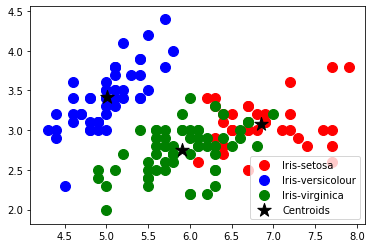

In [61]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(centroid[:, 0], centroid[:,1], s = 200, c = 'black', label = 'Centroids',marker='*')

plt.legend()

# Hence elbow method is used to successfully predict the number of clusters